<div align="center"> Tarefa 2 - Perceptron Multiclasse
<div align="center"> Redes Neurais 
<div align="center"> Vinícius Marques de Oliveira
<div align="center"> Ifes — Campus Serra — PPComp
<div align="center"> 2021/1

In [168]:
# https://github.com/fboldt/aulasann
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_moons, make_regression, make_circles
from sklearn.datasets import make_blobs


%matplotlib inline

Implemente uma Rede Neural rasa para classificação de uma base multiclasse.

Esta rede deve:

1. Aceitar rótulos que podem ser números ou textos;

In [169]:
from sklearn.preprocessing import LabelEncoder

def encode_rotulos_texto(rotulos):
    lb = LabelEncoder()
    return list(lb.fit_transform(rotulos))


2. Predizer os rótulos originais da base de dados;


In [170]:
def predict(self, X):
    a = self.preactivate(X)
    if len(self.w.shape)  > 1:
        idx = np.argmax(a, axis=1)
        ypred = np.array([self.labels[i] for i in idx])
    else:
        ypred = self.activation(a)
    return ypred

3. Passar por parâmetro no construtor:
    * Função de custo e cálculo do gradiente;
    * Taxa de aprendizado;
    * Número máximo de iterações;
    * Threshold;

In [171]:
# Funçao de custo e cálculo do gradiente
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def hinge_loss(y, ypred):
        erro_hl = np.multiply(y, ypred)
        return np.sum(1 - erro_hl), erro
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(X.T, CustoPerceptron.erro(y, ypred))

# Taxa de aprendizado
# self.alpha = alpha

# Número máximo de iterações
# self.maxiter = 200

# Threshold 
# self.threshold = 0


4. Funcionar para bases binárias.

In [172]:
# if len(self.labels) > 2:

In [173]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=True, alpha=0.001):
        self.w = None
        self.threshold = 0
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.maxiter = 200
        self.custo = True
        # self.threshold = ????
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.labels = list(set(y))
        if type(self.labels[0]) == 'str':
            y = encode_rotulos(self.labels)
        if len(self.labels) > 2:
            y = label_binarize(y, classes=self.labels)*2-1
            self.w = np.random.uniform(-1, 1, size=(Xb.shape[1], y.shape[1]))
        else:
            #y = label_binarize(y, classes=self.labels)*2-1
            self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            a = self.preactivate(X)
            ypred = self.activation(a)
            if self.custo:
                custo = CustoPerceptron().custo(y, ypred)
                if custo == 0:
                    break
                self.w = self.w + self.alpha*CustoPerceptron().gradiente(y, ypred, Xb)
            else:
                custo, erro = CustoPerceptron().hinge_loss(y, ypred)
                marginais = erro < 1 # Hinge-Loss
                if custo==0:
                    break
                self.w = self.w + self.alpha*np.matmul(y[marginais],
                                                       X[marginais])
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        if len(self.w.shape)  > 1:
            idx = np.argmax(a, axis=1)
        else:
            idx = np.array(self.activation(a) > self.threshold, dtype=int)
        ypred = np.array([self.labels[i] for i in idx])
        return ypred

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotahiperplano(vetor, bias=0, xmin=0, xmax=1):
    xs = np.linspace(xmin, xmax, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
    plt.plot(xs,ys)

def geradataset_bin(tamanho=20):
    X, y = make_blobs(n_samples=tamanho, centers=2)
    return X, y

def geradataset(tamanho=20, centros=2):
    X, y = make_blobs(n_samples=tamanho, centers=centros, n_features=4, center_box=(0, 1.0), cluster_std=0.05)
    return X, y




Teste pelo menos duas funções de custo diferentes em uma base multiclasse e uma base binária.

Plote gráficos com os hiperplanos separadores encontrados pelos algoritmos de treinamento. Se a base escolhida tiver mais do que 2 características, escolha as que você julgar que fornecem a melhor visualização.

0.76


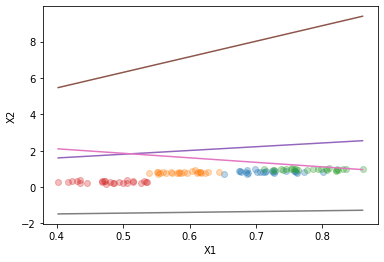

In [174]:
# Base Multiclasse 1 - Gerador de Data Set - Custo MSE

X, y = geradataset(100, 4)
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
#print(perceptron.w[1:], perceptron.w[0])
plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))

1.0


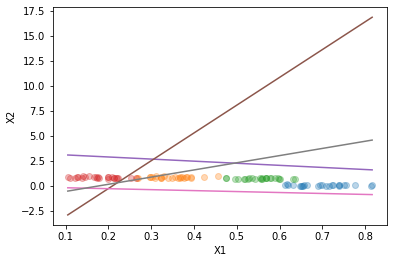

In [175]:
# Base Multiclasse  - Gerador de Data Set - Custo Hinge Loss

X, y = geradataset(100, 4)
perceptron_hl = Perceptron(custo=False)
perceptron_hl.fit(X, y)
ypred = perceptron_hl.predict(X)
print(sum(y == ypred)/len(y))
#print(perceptron_hl.w[1:], perceptron_hl.w[0])
plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(perceptron_hl.w[1:,i], perceptron_hl.w[0,i], min(X[:,0]), max(X[:,0]))

1.0


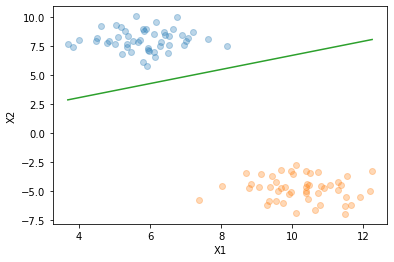

In [189]:
# Base Binária  - Gerador de Data Set Binario - Custo MSE

X, y = geradataset_bin(100)
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
#y = y*2-1
print(sum(y == ypred)/len(y))
#print(perceptron.w[1:], perceptron.w[0])
plotadataset(X, y)
plotahiperplano(perceptron.w, perceptron.w[0], min(X[:,0]), max(X[:,0]))

1.0


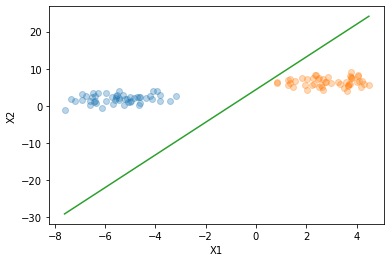

In [185]:
# Base Binária 2 - Gerador de Data Set Binario - Custo Hinge Loss

X, y = geradataset_bin(100)
perceptron_hl = Perceptron(custo=False)
perceptron_hl.fit(X, y)
ypred = perceptron_hl.predict(X)
#y = y*2-1
print(sum(y == ypred)/len(y))
#print(perceptron_hl.w[1:], perceptron_hl.w[0])
plotadataset(X, y)
plotahiperplano(perceptron_hl.w, perceptron_hl.w[0], min(X[:,0]), max(X[:,0]))